In [2]:
import numpy as np
import scipy as sp
import scipy.interpolate
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
import scipy.optimize

import minkowskitools as mt

In [3]:
def rms(x):
    return np.sqrt(x.dot(x)/x.size)

In [4]:
import importlib
importlib.reload(mt)

<module 'minkowski_tools' from '/Users/matthewcotton/OneDrive - Imperial College London/UROP Summer 2020/DAGmetrics/minkowski_tools.py'>

In [244]:
n = 10000
ps = np.arange(0.5, 1.55, 0.05)
ns = [n]*len(ps)
rs = mt.norm_kernel_2D(ps, 5/n)
mt.separate_simulations(ns, ps, rs, savename='test_func.txt')

n-10000, p-0.5, r-0.05477220097834299
Generated points.

/Users/matthewcotton/OneDrive - Imperial College London/UROP Summer 2020/DAGmetrics/minkowski_tools.py:103: RuntimeWarning: invalid value encountered in sqrt
  distsp = (x_diffs**pval + y_diffs**pval)*(x_diffs>0)*(y_diffs>0)
/Users/matthewcotton/OneDrive - Imperial College London/UROP Summer 2020/DAGmetrics/minkowski_tools.py:104: RuntimeWarning: invalid value encountered in less
  connections = (((distsp<radp)*distsp)**(1/pval))*(x_diffs>0)*(y_diffs>0)


Got connections.
Getting paths....Longest....Shortest....Saving file -> test_func.txt
n-10000, p-0.55, r-0.04930153791496095
Generated points.

/Users/matthewcotton/OneDrive - Imperial College London/UROP Summer 2020/DAGmetrics/minkowski_tools.py:103: RuntimeWarning: invalid value encountered in power
  distsp = (x_diffs**pval + y_diffs**pval)*(x_diffs>0)*(y_diffs>0)


Got connections.
Getting paths....Longest....Shortest....Saving file -> test_func.txt
n-10000, p-0.6000000000000001, r-0.045226095249907707
Generated points.Got connections.
Getting paths....Longest....Shortest....Saving file -> test_func.txt
n-10000, p-0.6500000000000001, r-0.04209065871728356
Generated points.Got connections.
Getting paths....Longest....Shortest....Saving file -> test_func.txt
n-10000, p-0.7000000000000002, r-0.03961491319486234
Generated points.Got connections.
Getting paths....Longest....Shortest....Saving file -> test_func.txt
n-10000, p-0.7500000000000002, r-0.03761802360384738
Generated points.Got connections.
Getting paths....Longest....Shortest....Saving file -> test_func.txt
n-10000, p-0.8000000000000003, r-0.03597839297223089
Generated points.Got connections.
Getting paths....Longest....Shortest....Saving file -> test_func.txt
n-10000, p-0.8500000000000003, r-0.03461169170392771
Generated points.Got connections.
Getting paths....Longest....Shortest....Saving

True

In [371]:
all_runs = pd.read_csv('test_func.txt', header=None, delimiter=" - ", names=mt.headers)
all_runs.shape
all_runs.round({'p': 2})

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,p,r,n,short_lengthBool,long_lengthBool,short_length,long_length,short_pathBoolpoints,long_pathBoolpoints,short_pathpoints,long_pathpoints
0,0.80,0.080450,2000,31.0,39.0,2.106931,2.262005,"[[1.0, 1.0], [0.9740970618984705, 0.9724339587...","[[1.0, 1.0], [0.9894497289342215, 0.9916729835...","[[1.0, 1.0], [0.9894497289342215, 0.9916729835...","[[1.0, 1.0], [0.9740970618984705, 0.9724339587..."
1,0.85,0.077394,2000,31.0,45.0,2.076668,2.177865,"[[1.0, 1.0], [0.9864179385118497, 0.9647771259...","[[1.0, 1.0], [0.9864179385118497, 0.9647771259...","[[1.0, 1.0], [0.9864179385118497, 0.9647771259...","[[1.0, 1.0], [0.9864179385118497, 0.9647771259..."
2,0.90,0.074814,2000,32.0,43.0,2.040722,2.112964,"[[1.0, 1.0], [0.9898748553026778, 0.9702677342...","[[1.0, 1.0], [0.9898748553026778, 0.9702677342...","[[1.0, 1.0], [0.9898748553026778, 0.9702677342...","[[1.0, 1.0], [0.9898748553026778, 0.9702677342..."
3,0.95,0.072610,2000,32.0,41.0,2.019957,2.043791,"[[1.0, 1.0], [0.9748584229893716, 0.9774815397...","[[1.0, 1.0], [0.9927737191769709, 0.9659217697...","[[1.0, 1.0], [0.9927737191769709, 0.9659217697...","[[1.0, 1.0], [0.9698888872040029, 0.9747698329..."
4,1.00,0.070711,2000,31.0,44.0,2.000000,2.000000,"[[1.0, 1.0], [0.9838402405808921, 0.9458584857...","[[1.0, 1.0], [0.9912684723671841, 0.9663231467...","[[1.0, 1.0], [0.9646208604668208, 0.9879830681...","[[1.0, 1.0], [0.9912684723671841, 0.9663231467..."
5,1.05,0.069059,2000,31.0,44.0,1.937246,1.957874,"[[1.0, 1.0], [0.9752704313457875, 0.9608644845...","[[1.0, 1.0], [0.9839472053593568, 0.9901561576...","[[1.0, 1.0], [0.9838714601616747, 0.9742340072...","[[1.0, 1.0], [0.978123873053921, 0.95756121503..."
6,1.10,0.067611,2000,32.0,44.0,1.882018,1.910695,"[[1.0, 1.0], [0.9783518548291524, 0.9800043007...","[[1.0, 1.0], [0.9783518548291524, 0.9800043007...","[[1.0, 1.0], [0.9783518548291524, 0.9800043007...","[[1.0, 1.0], [0.9825878129378194, 0.9612292920..."
7,1.15,0.066334,2000,31.0,39.0,1.832894,1.867719,"[[1.0, 1.0], [0.9674232512517247, 0.9793583354...","[[1.0, 1.0], [0.9805838031816996, 0.9912422412...","[[1.0, 1.0], [0.9762760141747377, 0.9537390297...","[[1.0, 1.0], [0.9470233106221041, 0.9945919711..."
8,0.80,0.080450,4000,29.0,44.0,2.062074,2.261350,"[[1.0, 1.0], [0.9653272781181138, 0.9823708126...","[[1.0, 1.0], [0.9876232607698674, 0.9988545050...","[[1.0, 1.0], [0.9263804648713456, 0.9995561751...","[[1.0, 1.0], [0.9793046664909343, 0.9808518107..."
9,0.85,0.077394,4000,30.0,41.0,2.051585,2.175985,"[[1.0, 1.0], [0.9811573620137561, 0.9632138705...","[[1.0, 1.0], [0.9924064718794291, 0.9549743909...","[[1.0, 1.0], [0.9924064718794291, 0.9549743909...","[[1.0, 1.0], [0.9585637631801798, 0.9746769058..."


In [378]:
n=4000
connected_runs = all_runs[all_runs['long_lengthBool'] > 0]
data = connected_runs[(connected_runs['n'] == n) & (connected_runs['r'] == mt.norm_kernel_2D(connected_runs['p'], 5/connected_runs['n']))]

print(data.shape)
data.head()

(62, 11)


,p,r,n,short_lengthBool,long_lengthBool,short_length,long_length,short_pathBoolpoints,long_pathBoolpoints,short_pathpoints,long_pathpoints
40,0.80,0.056887,4000,44.0,61.0,2.095930,2.282988,"[[1.0, 1.0], [0.9874935596965132, 0.9940186510...","[[1.0, 1.0], [0.9874935596965132, 0.9940186510...","[[1.0, 1.0], [0.9996034765495839, 0.9881304308...","[[1.0, 1.0], [0.9808809426200478, 0.9804994395..."
41,0.85,0.054726,4000,43.0,57.0,2.065468,2.169792,"[[1.0, 1.0], [0.9985070725213195, 0.9562967449...","[[1.0, 1.0], [0.9978290171352883, 0.9601653957...","[[1.0, 1.0], [0.9924480932173582, 0.9976790513...","[[1.0, 1.0], [0.9831999052940429, 0.9680588855..."
43,0.95,0.051343,4000,43.0,61.0,2.017360,2.048525,"[[1.0, 1.0], [0.9867459410969528, 0.9715240326...","[[1.0, 1.0], [0.9984480851627904, 0.9844130122...","[[1.0, 1.0], [0.9984480851627904, 0.9844130122...","[[1.0, 1.0], [0.9867459410969528, 0.9715240326..."
44,1.00,0.050000,4000,44.0,58.0,2.000000,2.000000,"[[1.0, 1.0], [0.9816189400588305, 0.9858510715...","[[1.0, 1.0], [0.9990688101395966, 0.9742705163...","[[1.0, 1.0], [0.9845986880262312, 0.9673815733...","[[1.0, 1.0], [0.9990688101395966, 0.9742705163..."
46,1.10,0.047808,4000,44.0,60.0,1.883386,1.907126,"[[1.0, 1.0], [0.978220397656843, 0.97541402502...","[[1.0, 1.0], [0.9670407063454397, 0.9900884319...","[[1.0, 1.0], [0.9670407063454397, 0.9900884319...","[[1.0, 1.0], [0.9670407063454397, 0.9900884319..."


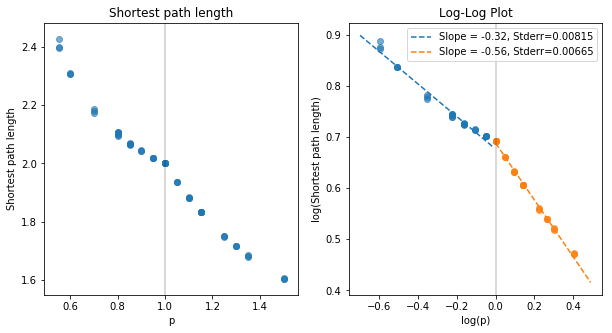

In [430]:
sub = data[data['p'] < 1]
sup = data[data['p'] > 1]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

ax1.scatter(data['p'], data['short_length'], alpha=0.6)
ax1.axvline(x=1, alpha=0.2, c='k')
ax1.set(xlabel='p', ylabel='Shortest path length', title='Shortest path length')

ax2.scatter(np.log(sub['p']), np.log(sub['short_length']), label='', alpha=0.6)
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(np.log(sub['p']), np.log(sub['short_length']))
subx = np.arange(-.7, 0, 0.01)
ax2.plot(subx, slope*subx+intercept, label=f'Slope = {slope:.2}, Stderr={std_err:.3}', ls='--')

ax2.scatter(np.log(sup['p']), np.log(sup['short_length']), label='', alpha=0.6)
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(np.log(sup['p']), np.log(sup['short_length']))
supx = np.arange(0, 0.5, 0.01)
ax2.plot(supx, slope*supx+intercept, label=f'Slope = {slope:.2}, Stderr={std_err:.3}', ls='--')

ax2.axvline(x=0, alpha=0.2, c='k')
ax2.set(xlabel='log(p)', ylabel='log(Shortest path length)', title='Log-Log Plot')

ax2.legend()
# plt.savefig('img/Shortpathlength.pdf')

In [380]:
ps = [p for p in data['p']]
angs = [mt.path_angles(mt.points_str(path)) for path in data['short_pathBoolpoints']]

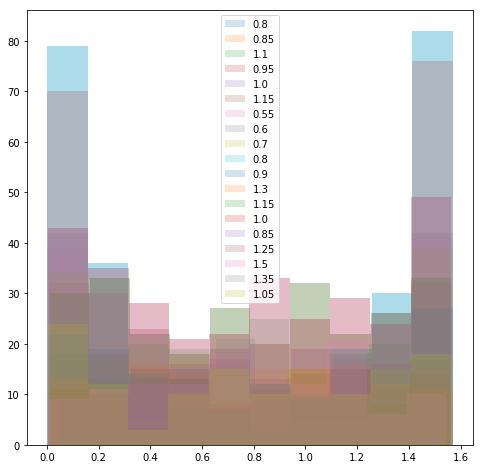

In [392]:
fig, ax = plt.subplots(figsize=(8, 8))

hist_data = {np.round(p, 2):[] for p in ps}

for ang, p in zip(angs, ps):
    hist_data[np.round(p, 2)].extend(ang)
    
[ax.hist(hist_data[np.round(p, 2)], label=np.round(p, 2), alpha=0.2) for p in set(ps)]

ax.legend()

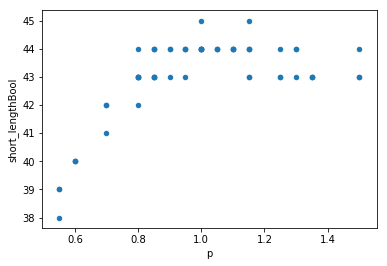

In [408]:
data.plot.scatter(x='p', y='short_lengthBool')

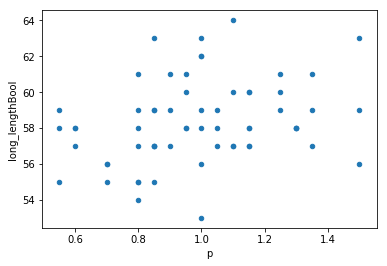

In [409]:
data.plot.scatter(x='p', y='long_lengthBool')

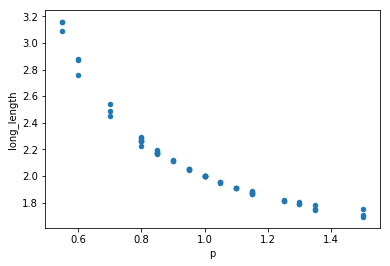

In [414]:
data.plot.scatter(x='p', y='long_length')

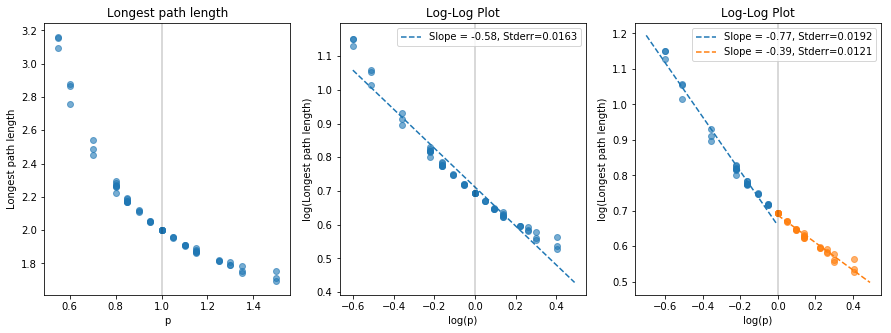

In [429]:
fig, [ax1, ax2, ax3] = plt.subplots(ncols=3, figsize=(15, 5))

ax1.scatter(data['p'], data['long_length'], alpha=0.6)
ax1.axvline(x=1, alpha=0.2, c='k')
ax1.set(xlabel='p', ylabel='Longest path length', title='Longest path length')
ax2.scatter(np.log(data['p']), np.log(data['long_length']), label='', alpha=0.6)

slope, intercept, r_value, p_value, std_err = sp.stats.linregress(np.log(data['p']), np.log(data['long_length']))
x = np.arange(-0.6, 0.5, 0.01)
ax2.plot(x, slope*x+intercept, label=f'Slope = {slope:.2}, Stderr={std_err:.3}', ls='--')

ax2.axvline(x=0, alpha=0.2, c='k')
ax2.set(xlabel='log(p)', ylabel='log(Longest path length)', title='Log-Log Plot')

ax2.legend()

sub = data[data['p'] < 1]
sup = data[data['p'] > 1]

ax3.scatter(np.log(sub['p']), np.log(sub['long_length']), label='', alpha=0.6)
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(np.log(sub['p']), np.log(sub['long_length']))
subx = np.arange(-.7, 0, 0.01)
ax3.plot(subx, slope*subx+intercept, label=f'Slope = {slope:.2}, Stderr={std_err:.3}', ls='--')

ax3.scatter(np.log(sup['p']), np.log(sup['long_length']), label='', alpha=0.6)
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(np.log(sup['p']), np.log(sup['long_length']))
supx = np.arange(0, 0.5, 0.01)
ax3.plot(supx, slope*supx+intercept, label=f'Slope = {slope:.2}, Stderr={std_err:.3}', ls='--')

ax3.axvline(x=0, alpha=0.2, c='k')
ax3.set(xlabel='log(p)', ylabel='log(Longest path length)', title='Log-Log Plot')

ax3.legend()

# plt.savefig('img/Longpathlength.pdf')

In [30]:
all_dim_data = pd.read_csv('outputs/dimensionrun.txt', header=None, delimiter=" - ", names=mt.headers)
dim_data = all_dim_data[all_dim_data['p'] == 0.8]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [34]:
all_new_dim_data

,p,r,n,short_lengthBool,long_lengthBool,short_length,long_length,short_pathBoolpoints,long_pathBoolpoints,short_pathpoints,long_pathpoints
0,0.8,0.254406,200,10.0,28.0,2.114872,2.368085,"[[1.0, 1.0], [0.8858671140713967, 0.9492561802...","[[1.0, 1.0], [0.9265253686024322, 0.9929290586...","[[1.0, 1.0], [0.9265253686024322, 0.9929290586...","[[1.0, 1.0], [0.896594031904232, 0.95045064021..."
1,0.8,0.179892,400,14.0,36.0,2.141083,2.359079,"[[1.0, 1.0], [0.9615005272555283, 0.9094825432...","[[1.0, 1.0], [0.9615005272555283, 0.9094825432...","[[1.0, 1.0], [0.9615005272555283, 0.9094825432...","[[1.0, 1.0], [0.9615005272555283, 0.9094825432..."
2,0.8,0.146881,600,17.0,41.0,2.109698,2.360322,"[[1.0, 1.0], [0.9316625708383883, 0.9551912138...","[[1.0, 1.0], [0.9850201124312584, 0.9351782887...","[[1.0, 1.0], [0.9758363515952914, 0.9435771694...","[[1.0, 1.0], [0.9316625708383883, 0.9551912138..."
3,0.8,0.127203,800,20.0,53.0,2.102491,2.363303,"[[1.0, 1.0], [0.9881115419888591, 0.9224371626...","[[1.0, 1.0], [0.9946539744642509, 0.9652412234...","[[1.0, 1.0], [0.9946539744642509, 0.9652412234...","[[1.0, 1.0], [0.9753599561133571, 0.9806792736..."
4,0.8,0.113774,1000,22.0,58.0,2.113043,2.360579,"[[1.0, 1.0], [0.9455751376003223, 0.9588622714...","[[1.0, 1.0], [0.9848353672721905, 0.9773719048...","[[1.0, 1.0], [0.9876145777915337, 0.9455530303...","[[1.0, 1.0], [0.9455751376003223, 0.9588622714..."
5,0.8,0.103861,1200,24.0,63.0,2.115547,2.355761,"[[1.0, 1.0], [0.9800862533483035, 0.9825165495...","[[1.0, 1.0], [0.995494286695979, 0.98431750430...","[[1.0, 1.0], [0.995494286695979, 0.98431750430...","[[1.0, 1.0], [0.9800862533483035, 0.9825165495..."
6,0.8,0.096156,1400,25.0,67.0,2.101457,2.363282,"[[1.0, 1.0], [0.9740885938952087, 0.9444047694...","[[1.0, 1.0], [0.9953253743302478, 0.9276763413...","[[1.0, 1.0], [0.9953253743302478, 0.9276763413...","[[1.0, 1.0], [0.9740885938952087, 0.9444047694..."
7,0.8,0.089946,1600,27.0,81.0,2.105184,2.363973,"[[1.0, 1.0], [0.9363656905272505, 0.9853061558...","[[1.0, 1.0], [0.994479818841361, 0.99646446687...","[[1.0, 1.0], [0.9584610796679714, 0.9984955950...","[[1.0, 1.0], [0.9805457763776699, 0.9639462490..."
8,0.8,0.084802,1800,28.0,83.0,2.094966,2.363692,"[[1.0, 1.0], [0.9972021314679653, 0.9266968610...","[[1.0, 1.0], [0.9811214178989611, 0.9722173292...","[[1.0, 1.0], [0.9273413831137906, 0.9974375256...","[[1.0, 1.0], [0.9899941963045729, 0.9620442751..."
9,0.8,0.080450,2000,31.0,88.0,2.096289,2.368284,"[[1.0, 1.0], [0.9632976799866819, 0.9760397948...","[[1.0, 1.0], [0.9988294658714783, 0.9374026360...","[[1.0, 1.0], [0.9988294658714783, 0.9374026360...","[[1.0, 1.0], [0.9632976799866819, 0.9760397948..."


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


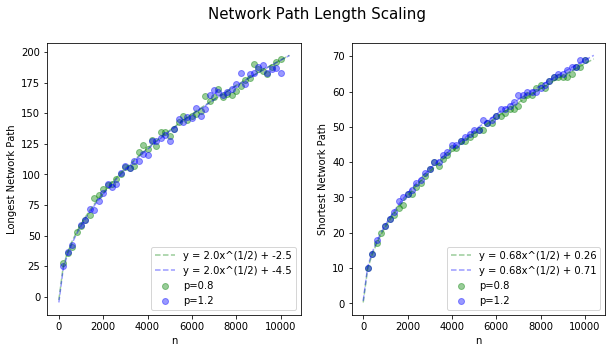

In [50]:
def func(x, a, b):
    return a*np.sqrt(x) + b

all_new_dim_data = pd.read_csv('outputs/dimensionrun.txt', header=None, delimiter=" - ", names=mt.headers)
new_dim_data = all_new_dim_data[all_new_dim_data['long_lengthBool'] > 0]
p2 = new_dim_data[new_dim_data['p'] == 1.2]
phalf= new_dim_data[new_dim_data['p'] == .8]

fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(10, 5))

x = np.arange(0, 10500, 200)

ax1.scatter(phalf['n'], phalf['long_lengthBool'], label='p=0.8', c='g', alpha=0.4)
long_half, _ = sp.optimize.curve_fit(func, phalf['n'], phalf['long_lengthBool'])
ax1.plot(x, func(x, *long_half), ls='--',  label=f'y = {long_half[0]:.2}x^(1/2) + {long_half[1]:.2}', c='g', alpha=0.4)

ax1.scatter(p2['n'], p2['long_lengthBool'], label='p=1.2', c='b', alpha=0.4)
long_2, _ = sp.optimize.curve_fit(func, p2['n'], p2['long_lengthBool'])
ax1.plot(x, func(x, *long_2), ls='--',  label=f'y = {long_2[0]:.2}x^(1/2) + {long_2[1]:.2}', c='b', alpha=0.4)


ax2.scatter(phalf['n'], phalf['short_lengthBool'], label='p=0.8', c='g', alpha=0.4)
short_half, _ = sp.optimize.curve_fit(func, phalf['n'], phalf['short_lengthBool'])
ax2.plot(x, func(x, *short_half), ls='--',  label=f'y = {short_half[0]:.2}x^(1/2) + {short_half[1]:.2}', c='g', alpha=0.4)


ax2.scatter(p2['n'], p2['short_lengthBool'], label='p=1.2', c='b', alpha=0.4)
short_2, _ = sp.optimize.curve_fit(func, p2['n'], p2['short_lengthBool'])
ax2.plot(x, func(x, *short_2), ls='--',  label=f'y = {short_2[0]:.2}x^(1/2) + {short_2[1]:.2}', c='b', alpha=0.4)


# slope, intercept, r_value, p_value, std_err = sp.stats.linregress(dim_data['n'], dim_data['long_lengthBool'])
# ax1.plot(x, slope*x+intercept, label=f'y = {slope:.2}x + {intercept:.2}', ls='--')

# popt, pcov = sp.optimize.curve_fit(func, dim_data['n'], dim_data['short_lengthBool'])
# ax2.plot(x, func(x, *popt), ls='--',  label=f'y = {popt[0]:.2}x^(1/2) + {popt[1]:.2}')

# new_slope, new_intercept, new_r_value, new_p_value, new_std_err = sp.stats.linregress(new_dim_data['n'], new_dim_data['long_lengthBool'])
# ax1.plot(x, new_slope*x+new_intercept, label=f'y = {new_slope:.2}x + {new_intercept:.2}', ls='--')

# new_popt, new_pcov = sp.optimize.curve_fit(func, new_dim_data['n'], new_dim_data['short_lengthBool'])
# ax2.plot(x, func(x, *new_popt), ls='--',  label=f'y = {new_popt[0]:.2}x^(1/2) + {new_popt[1]:.2}')

ax2.set(xlabel='n', ylabel='Shortest Network Path') #title='Shortest Network Path', 
ax2.legend()

ax1.set(xlabel='n', ylabel='Longest Network Path') #title='Longest Network Path', 
ax1.legend()

fig.suptitle('Network Path Length Scaling', size=15);
# plt.savefig('img/cleanscaling.pdf')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


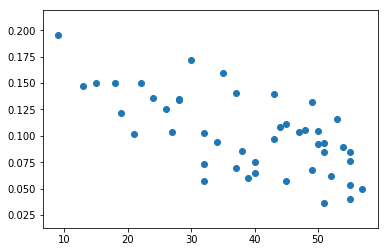

In [212]:
short_paths = [mt.points_str(pointstr) for pointstr in phalf['short_pathpoints']]        
short_diffs = [path[0]-path[1] for path in short_paths]
short_stds = [np.std(diff) for diff in short_diffs]

short_pathsBool = [mt.points_str(pointstr) for pointstr in phalf['short_pathBoolpoints']]        
short_diffsBool = [path[0]-path[1] for path in short_pathsBool]
short_stdsBool = [np.std(diff) for diff in short_diffsBool]

phalf['short_stdsBool'] = short_stdsBool
phalf['short_stds'] = short_stds

plt.scatter(phalf['short_lengthBool'], phalf['short_stdsBool'])

In [599]:
all_newrun = pd.read_csv('newrun.txt', header=None, delimiter=" - ", names=mt.headers)
newrun = all_newrun[all_newrun['long_lengthBool']>0]
newrun.head()
# plt.scatter(dim_data['n'], dim_data['long_lengthBool'])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,p,r,n,short_lengthBool,long_lengthBool,short_length,long_length,short_pathBoolpoints,long_pathBoolpoints,short_pathpoints,long_pathpoints
0,0.50,0.054772,10000,59.0,90.0,2.522375,3.419910,"[[1.0, 1.0], [0.9959100200969712, 0.9913712408...","[[1.0, 1.0], [0.9959100200969712, 0.9913712408...","[[1.0, 1.0], [0.9959100200969712, 0.9913712408...","[[1.0, 1.0], [0.997752137772247, 0.97702574480..."
1,0.51,0.053536,10000,58.0,93.0,2.467962,3.385560,"[[1.0, 1.0], [0.9810491084132017, 0.9975864150...","[[1.0, 1.0], [0.993911805175879, 0.99985531905...","[[1.0, 1.0], [0.9947805727317309, 0.9967993985...","[[1.0, 1.0], [0.9810491084132017, 0.9975864150..."
2,0.52,0.052376,10000,59.0,84.0,2.438077,3.226024,"[[1.0, 1.0], [0.9952190212467383, 0.9737342596...","[[1.0, 1.0], [0.9959219551173405, 0.9984344370...","[[1.0, 1.0], [0.9993666545167119, 0.9863377320...","[[1.0, 1.0], [0.9938968980314278, 0.9766142885..."
4,0.54,0.050265,10000,58.0,86.0,2.384950,3.039199,"[[1.0, 1.0], [0.9870767172489514, 0.9942968675...","[[1.0, 1.0], [0.9903117713395266, 0.9956557956...","[[1.0, 1.0], [0.9980012488620479, 0.9963635136...","[[1.0, 1.0], [0.989958332189476, 0.98268395773..."
5,0.55,0.049302,10000,60.0,90.0,2.378848,3.031984,"[[1.0, 1.0], [0.9930141643989682, 0.9896845045...","[[1.0, 1.0], [0.9973163988931635, 0.9857392694...","[[1.0, 1.0], [0.9791534337942849, 0.9974901763...","[[1.0, 1.0], [0.9973163988931635, 0.9857392694..."


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


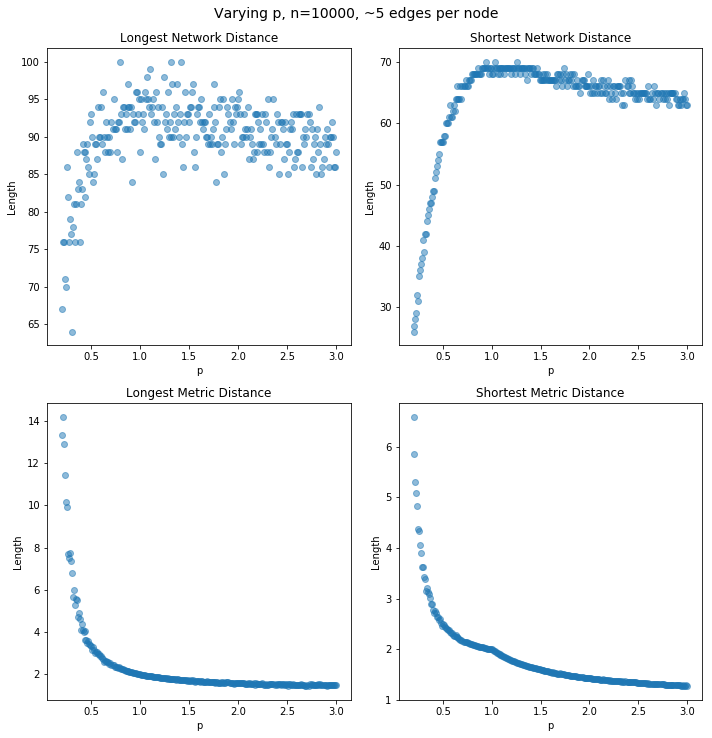

In [109]:
allbigrun = pd.read_csv('outputs/10000bigrange.txt', header=None, delimiter=" - ", names=mt.headers)
bigrun = allbigrun[allbigrun['long_length'] > 0]

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))

lengths = ['long_lengthBool', 'short_lengthBool', 'long_length', 'short_length']
titles = ['Longest Network Distance', 'Shortest Network Distance', 'Longest Metric Distance', 'Shortest Metric Distance']

for ax, length, title in zip(axes.flatten(), lengths, titles):
    ax.scatter(bigrun['p'], bigrun[length], alpha=0.5)
    ax.set(xlabel='p', ylabel='Length', title=title)
fig.suptitle('Varying p, n=10000, ~5 edges per node', y=1.02, size=14)
plt.tight_layout()
plt.savefig('img/bigrunsummary.pdf')

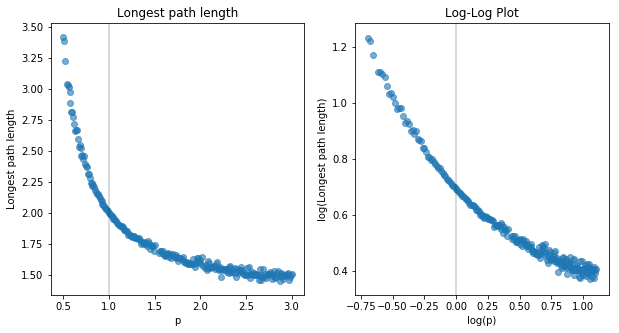

In [600]:
fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(10, 5))

ax1.scatter(newrun['p'], newrun['long_length'], alpha=0.6)
ax1.axvline(x=1, alpha=0.2, c='k')
ax1.set(xlabel='p', ylabel='Longest path length', title='Longest path length')
ax2.scatter(np.log(newrun['p']), np.log(newrun['long_length']), label='', alpha=0.6)

ax2.axvline(x=0, alpha=0.2, c='k')
ax2.set(xlabel='log(p)', ylabel='log(Longest path length)', title='Log-Log Plot');

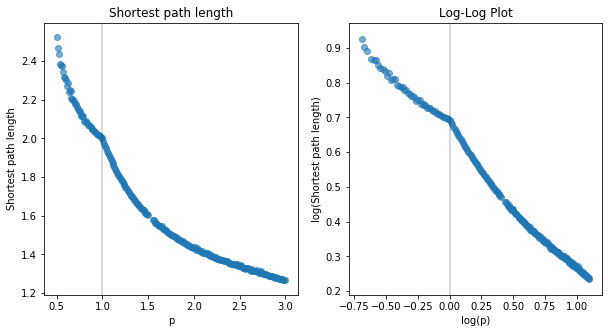

In [601]:
fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(10, 5))

ax1.scatter(newrun['p'], newrun['short_length'], alpha=0.6)
ax1.axvline(x=1, alpha=0.2, c='k')
ax1.set(xlabel='p', ylabel='Shortest path length', title='Shortest path length')
ax2.scatter(np.log(newrun['p']), np.log(newrun['short_length']), label='', alpha=0.6)

ax2.axvline(x=0, alpha=0.2, c='k')
ax2.set(xlabel='log(p)', ylabel='log(Shortest path length)', title='Log-Log Plot');

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


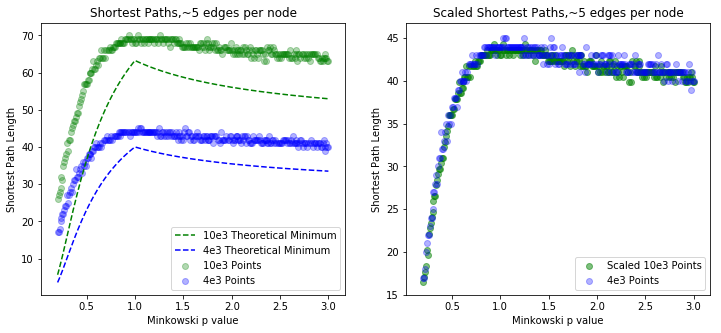

In [117]:
allbigrun = pd.read_csv('outputs/10000_5bigrange.txt', header=None, delimiter=" - ", names=mt.headers)
bigrun = allbigrun[allbigrun['long_length'] > 0]

all4k = pd.read_csv('outputs/4000_5bigrange.txt', header=None, delimiter=" - ", names=mt.headers)
k4 = all4k[all4k['long_length'] > 0].sort_values('p', axis=0)

theoretical10k = np.concatenate(((2/bigrun[bigrun['p'] < 1]['r']), (2**(1/bigrun[bigrun['p'] >= 1]['p'])/bigrun[bigrun['p'] >= 1]['r'])))
theoretical4k = np.concatenate(((2/k4[k4['p'] < 1]['r']), (2**(1/k4[k4['p'] >= 1]['p'])/k4[k4['p'] >= 1]['r'])))

fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(bigrun['p'], bigrun['short_lengthBool'], label='10e3 Points', alpha=0.3, c='g')
ax1.scatter(k4['p'], k4['short_lengthBool'], label='4e3 Points', alpha=0.3, c='b')
ax1.plot(bigrun['p'], theoretical10k, 'g--', label='10e3 Theoretical Minimum')
ax1.plot(k4['p'], theoretical4k, 'b--', label='4e3 Theoretical Minimum')
ax1.legend()
ax1.set(title='Shortest Paths,~5 edges per node', xlabel='Minkowski p value', ylabel='Shortest Path Length');

ax2.scatter(bigrun['p'], bigrun['short_lengthBool']/np.sqrt(2.5), label='Scaled 10e3 Points', alpha=0.5, c='g')
ax2.scatter(k4['p'], k4['short_lengthBool'], label='4e3 Points', alpha=0.3, c='b')
ax2.set(title='Scaled Shortest Paths,~5 edges per node', xlabel='Minkowski p value', ylabel='Shortest Path Length');
ax2.legend()

# plt.savefig('img/n_scale_short.pdf')

# less = bigrun[bigrun['p'] < 1]
# more = bigrun[bigrun['p'] >= 1]
# theoretical = np.concatenate(((2/less['r']), (2**(1/more['p'])/more['r'])))

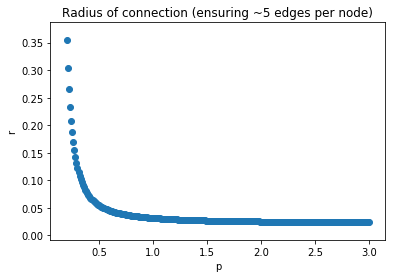

In [115]:
plt.scatter(bigrun['p'], bigrun['r'])
plt.gca().set(xlabel='p', ylabel='r', title='Radius of connection (ensuring ~5 edges per node)');

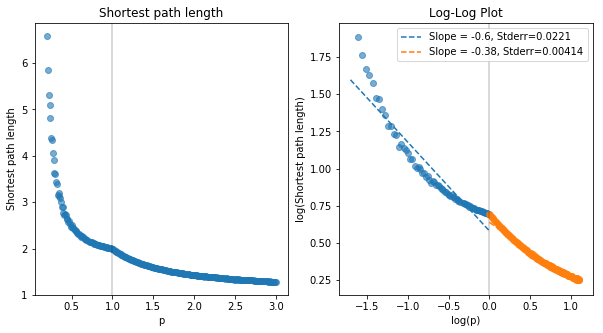

In [9]:
sub = bigrun[bigrun['p'] < 1]
sup = bigrun[bigrun['p'] > 1]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

ax1.scatter(bigrun['p'], bigrun['short_length'], alpha=0.6)
ax1.axvline(x=1, alpha=0.2, c='k')
ax1.set(xlabel='p', ylabel='Shortest path length', title='Shortest path length')

ax2.scatter(np.log(sub['p']), np.log(sub['short_length']), label='', alpha=0.6)
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(np.log(sub['p']), np.log(sub['short_length']))
subx = np.arange(-1.7, 0, 0.01)
ax2.plot(subx, slope*subx+intercept, label=f'Slope = {slope:.2}, Stderr={std_err:.3}', ls='--')

ax2.scatter(np.log(sup['p']), np.log(sup['short_length']), label='', alpha=0.6)
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(np.log(sup['p']), np.log(sup['short_length']))
supx = np.arange(0, 0.5, 0.01)
ax2.plot(supx, slope*supx+intercept, label=f'Slope = {slope:.2}, Stderr={std_err:.3}', ls='--')

ax2.axvline(x=0, alpha=0.2, c='k')
ax2.set(xlabel='log(p)', ylabel='log(Shortest path length)', title='Log-Log Plot')

ax2.legend()
# plt.savefig('img/10000Shortpathlength.pdf')

In [9]:
def moving_average(a, n=3) :
    ret = np.cumsum(np.array(a))
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [28]:
allfive4k = pd.read_csv('outputs/4000_5bigrange.txt', header=None, delimiter=" - ", names=mt.headers)
five4k = allfive4k[allfive4k['long_length'] > 0]

allten4k = pd.read_csv('outputs/4000_10bigrange.txt', header=None, delimiter=" - ", names=mt.headers)
ten4k = allten4k[allten4k['long_length'] > 0]

alltwenty4k = pd.read_csv('outputs/4000_20bigrange.txt', header=None, delimiter=" - ", names=mt.headers)
twenty4k = alltwenty4k[alltwenty4k['long_length'] > 0]

allfourty4k = pd.read_csv('outputs/4000_40bigrange.txt', header=None, delimiter=" - ", names=mt.headers)
fourty4k = allfourty4k[allfourty4k['long_length'] > 0]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
 

In [21]:
five4k.tail()

,p,r,n,short_lengthBool,long_lengthBool,short_length,long_length,short_pathBoolpoints,long_pathBoolpoints,short_pathpoints,long_pathpoints
47,2.75,0.037986,4000,41.0,118.0,1.319464,1.806919,"[[1.0, 1.0], [0.9763730147636631, 0.9794269719...","[[1.0, 1.0], [0.9692421108196252, 0.9898766590...","[[1.0, 1.0], [0.9692421108196252, 0.9898766590...","[[1.0, 1.0], [0.9951004894583771, 0.9621792189..."
48,2.80,0.037906,4000,40.0,121.0,1.307325,1.802466,"[[1.0, 1.0], [0.9699313998002976, 0.9812098569...","[[1.0, 1.0], [0.9920555119602601, 0.9839493649...","[[1.0, 1.0], [0.9699313998002976, 0.9812098569...","[[1.0, 1.0], [0.9920555119602601, 0.9839493649..."
49,2.85,0.037829,4000,42.0,121.0,1.306724,1.789225,"[[1.0, 1.0], [0.9715687711757814, 0.9960510167...","[[1.0, 1.0], [0.9865588065488207, 0.9957222504...","[[1.0, 1.0], [0.9865588065488207, 0.9957222504...","[[1.0, 1.0], [0.9985691740473208, 0.9934616661..."
50,2.90,0.037755,4000,41.0,116.0,1.294240,1.817104,"[[1.0, 1.0], [0.9951095355531011, 0.9754812164...","[[1.0, 1.0], [0.9982621980990383, 0.9736614273...","[[1.0, 1.0], [0.9812449188365441, 0.9866929817...","[[1.0, 1.0], [0.9982621980990383, 0.9736614273..."
51,2.95,0.037685,4000,41.0,118.0,1.295514,1.839879,"[[1.0, 1.0], [0.9723535898030736, 0.9847289030...","[[1.0, 1.0], [0.9754182642569289, 0.9939798853...","[[1.0, 1.0], [0.9858645751647589, 0.9813975177...","[[1.0, 1.0], [0.9754182642569289, 0.9939798853..."


In [20]:
fourty4k.tail()

,p,r,n,short_lengthBool,long_lengthBool,short_length,long_length,short_pathBoolpoints,long_pathBoolpoints,short_pathpoints,long_pathpoints
47,2.75,0.037986,4000,42.0,122.0,1.313521,1.818110,"[[1.0, 1.0], [0.9975390260085047, 0.9645481583...","[[1.0, 1.0], [0.9838092902037737, 0.9999922390...","[[1.0, 1.0], [0.9811927436131194, 0.9754035154...","[[1.0, 1.0], [0.9838092902037737, 0.9999922390..."
48,2.80,0.037906,4000,42.0,123.0,1.311399,1.800133,"[[1.0, 1.0], [0.9877928820864397, 0.9728097944...","[[1.0, 1.0], [0.9877928820864397, 0.9728097944...","[[1.0, 1.0], [0.9877928820864397, 0.9728097944...","[[1.0, 1.0], [0.9877928820864397, 0.9728097944..."
49,2.85,0.037829,4000,41.0,117.0,1.302440,1.817661,"[[1.0, 1.0], [0.9647612118111657, 0.9997540915...","[[1.0, 1.0], [0.9858495712236476, 0.9901115990...","[[1.0, 1.0], [0.9806269683251385, 0.9751720258...","[[1.0, 1.0], [0.9647612118111657, 0.9997540915..."
50,2.90,0.037755,4000,41.0,134.0,1.288459,1.822961,"[[1.0, 1.0], [0.9932982531368583, 0.9686636553...","[[1.0, 1.0], [0.9705149375235292, 0.9955409081...","[[1.0, 1.0], [0.9828235370419403, 0.9799308977...","[[1.0, 1.0], [0.9978230833604597, 0.9909939324..."
51,2.95,0.037685,4000,41.0,119.0,1.307786,1.782172,"[[1.0, 1.0], [0.9885883580680946, 0.9634257106...","[[1.0, 1.0], [0.9832952339636609, 0.9789942863...","[[1.0, 1.0], [0.9832952339636609, 0.9789942863...","[[1.0, 1.0], [0.9832952339636609, 0.9789942863..."


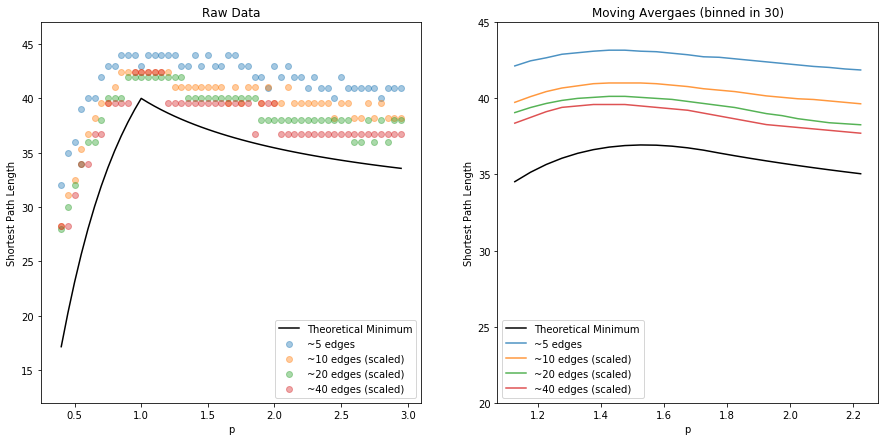

In [29]:

theoretical4k = np.concatenate(((2/five4k[five4k['p'] < 1]['r']), (2**(1/five4k[five4k['p'] >= 1]['p'])/five4k[five4k['p'] >= 1]['r'])))

n_av = 30

fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(15, 7))

ax1.scatter(five4k['p'], five4k['short_lengthBool'], label='~5 edges', alpha=0.4)
ax1.scatter(ten4k['p'], np.sqrt(2)*ten4k['short_lengthBool'], label='~10 edges (scaled)', alpha=0.4)
ax1.scatter(twenty4k['p'], 2*twenty4k['short_lengthBool'], label='~20 edges (scaled)', alpha=0.4)
ax1.scatter(fourty4k['p'], np.sqrt(8)*fourty4k['short_lengthBool'], label='~40 edges (scaled)', alpha=0.4)
ax1.plot(five4k['p'], theoretical4k, 'k', label='Theoretical Minimum') 

ax1.legend()
ax1.set(xlabel='p', ylabel='Shortest Path Length', ylim=(12, 47), title='Raw Data')

ax2.plot(moving_average(five4k['p'], n_av), moving_average(theoretical4k, n_av), 'k', label='Theoretical Minimum')
ax2.plot(moving_average(five4k['p'], n_av), moving_average(five4k['short_lengthBool'], n_av), label='~5 edges', alpha=0.8)
ax2.plot(moving_average(ten4k['p'], n_av), moving_average(np.sqrt(2)*ten4k['short_lengthBool'], n_av), label='~10 edges (scaled)', alpha=0.8)
ax2.plot(moving_average(twenty4k['p'], n_av), moving_average(2*twenty4k['short_lengthBool'], n_av), label='~20 edges (scaled)', alpha=0.8)
ax2.plot(moving_average(fourty4k['p'], n_av), moving_average(np.sqrt(8)*fourty4k['short_lengthBool'], n_av), label='~40 edges (scaled)', alpha=0.8)

ax2.legend()
ax2.set(xlabel='p', ylabel='Shortest Path Length', ylim=(20, 45), title=f'Moving Avergaes (binned in {n_av})');

# plt.savefig('img/shortBoolcomp.pdf')

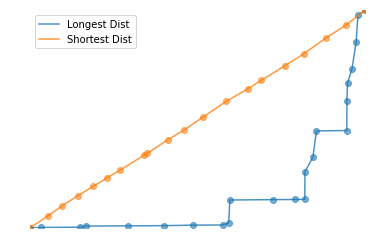

In [86]:
plt.figure()
ax = plt.gca()

mt.plot_path_points(ax, paths=[mt.points_str(fourty4k.iloc[89]['long_pathpoints']), mt.points_str(fourty4k.iloc[89]['short_pathpoints'])], path_labels=['Longest Dist', 'Shortest Dist'])

In [42]:
all_quick = pd.read_csv('outputs/quick_run.txt', header=None, delimiter=" - ", names=mt.headers)
quick = all_quick[(all_quick['long_length'] > 0) & (all_quick['short_lengthBool'] > 0)]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [46]:
short_paths = [mt.points_str(pointstr) for pointstr in quick['short_pathpoints']]        
short_diffs = [path[0]-path[1] for path in short_paths]
short_rms = [rms(diff) for diff in short_diffs]
short_stds = [np.std(diff) for diff in short_diffs]

long_paths = [mt.points_str(pointstr) for pointstr in quick['long_pathpoints']]        
long_diffs = [path[0]-path[1] for path in long_paths]
long_rms = [rms(diff) for diff in long_diffs]
long_stds = [np.std(diff) for diff in long_diffs]

short_pathsBool = [mt.points_str(pointstr) for pointstr in quick['short_pathBoolpoints']]        
short_diffsBool = [path[0]-path[1] for path in short_pathsBool]
short_rmsBool = [rms(diff) for diff in short_diffsBool]
short_stdsBool = [np.std(diff) for diff in short_diffsBool]

long_pathsBool = [mt.points_str(pointstr) for pointstr in quick['long_pathBoolpoints']]        
long_diffsBool = [path[0]-path[1] for path in long_pathsBool]
long_rmsBool = [rms(diff) for diff in long_diffsBool]
long_stdsBool = [np.std(diff) for diff in long_diffsBool]

quick['long_stdsBool'] = long_stdsBool
quick['short_stdsBool'] = short_stdsBool
quick['long_stds'] = long_stds
quick['short_stds'] = short_stds

quick['long_rmsBool'] = long_rmsBool
quick['short_rmsBool'] = short_rmsBool
quick['long_rms'] = long_rms
quick['short_rms'] = short_rms

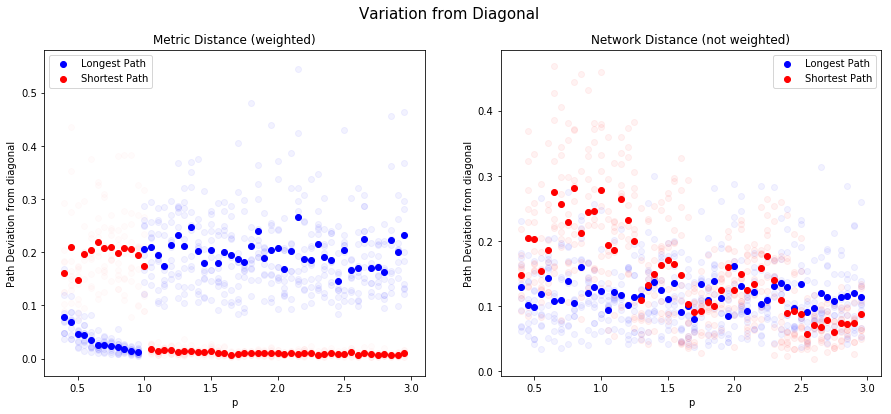

In [47]:
fig, [ax1, ax2] = plt.subplots(ncols=2, nrows=1, figsize=(15, 6))

comparison_data = quick.groupby(['p', 'r', 'n']).mean().reset_index()

ax1.scatter(quick['p'], quick['long_rms'], label="", alpha=0.05, c='b')
ax1.scatter(quick['p'], quick['short_rms'], label="", alpha=0.015, c='r')
ax1.scatter(comparison_data['p'], comparison_data['long_rms'], label="Longest Path", alpha=1, c='b')
ax1.scatter(comparison_data['p'], comparison_data['short_rms'], label="Shortest Path", alpha=1, c='r')
# ax1.plot(comparison_data['p'], comparison_data['long_stds'], label="", alpha=.8, c='b')
# ax1.plot(comparison_data['p'], comparison_data['short_stds'], label="", alpha=.8, c='r')
ax1.set(xlabel='p', ylabel='Path Deviation from diagonal', title='Metric Distance (weighted)')
ax1.legend(loc='upper left')

ax2.scatter(quick['p'], quick['long_rmsBool'], label="", alpha=0.05, c='b')
ax2.scatter(quick['p'], quick['short_rmsBool'], label="", alpha=0.05, c='r')
ax2.scatter(comparison_data['p'], comparison_data['long_rmsBool'], label="Longest Path", alpha=1, c='b')
ax2.scatter(comparison_data['p'], comparison_data['short_rmsBool'], label="Shortest Path", alpha=1, c='r')
# ax2.plot(comparison_data['p'], comparison_data['long_stdsBool'], label="", alpha=.8, c='b')
# ax2.plot(comparison_data['p'], comparison_data['short_stdsBool'], label="", alpha=.8, c='r')
ax2.set(xlabel='p', ylabel='Path Deviation from diagonal', title='Network Distance (not weighted)')
ax2.legend(loc='upper right')

fig.suptitle('Variation from Diagonal', size=15)
plt.savefig('img/diagvariationrms.pdf')

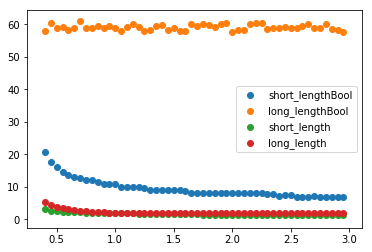

In [8]:
plt.scatter(comparison_data['p'], comparison_data['short_lengthBool'], label='short_lengthBool')
plt.scatter(comparison_data['p'], comparison_data['long_lengthBool'], label='long_lengthBool')
plt.scatter(comparison_data['p'], comparison_data['short_length'], label='short_length')
plt.scatter(comparison_data['p'], comparison_data['long_length'], label='long_length')
plt.legend()

In [9]:
min(quick['p']), max(quick['p'])

(0.4, 2.9499999999999997)

In [11]:
quick

,p,r,n,short_lengthBool,long_lengthBool,short_length,long_length,short_pathBoolpoints,long_pathBoolpoints,short_pathpoints,long_pathpoints,long_stdsBool,short_stdsBool,long_stds,short_stds
0,0.40,0.2,1000,21,60,3.001659,5.320661,"[[1.0, 1.0], [0.9968239652325661, 0.9097533964...","[[1.0, 1.0], [0.9779727129832093, 0.9830928810...","[[1.0, 1.0], [0.9968239652325661, 0.9097533964...","[[1.0, 1.0], [0.9715052553606403, 0.9772657862...",0.163162,0.142137,0.036845,0.180822
1,0.45,0.2,1000,18,58,2.780740,4.524856,"[[1.0, 1.0], [0.9986505060806483, 0.8589472570...","[[1.0, 1.0], [0.9990820780919727, 0.9896031745...","[[1.0, 1.0], [0.9990820780919727, 0.9896031745...","[[1.0, 1.0], [0.9795996880143497, 0.9491876414...",0.138778,0.249283,0.116941,0.352266
2,0.50,0.2,1000,16,55,2.450761,3.930322,"[[1.0, 1.0], [0.9990316178178615, 0.8774078290...","[[1.0, 1.0], [0.9919969565533842, 0.9957694314...","[[1.0, 1.0], [0.9990316178178615, 0.8774078290...","[[1.0, 1.0], [0.9812075369457282, 0.9448166566...",0.150518,0.183863,0.048697,0.171645
3,0.55,0.2,1000,15,57,2.302511,3.492719,"[[1.0, 1.0], [0.9773477041090787, 0.9130850264...","[[1.0, 1.0], [0.9872204591094471, 0.9963402248...","[[1.0, 1.0], [0.9872204591094471, 0.9963402248...","[[1.0, 1.0], [0.9631558298216357, 0.9504782267...",0.086652,0.084091,0.047661,0.249372
4,0.60,0.2,1000,14,60,2.256186,3.151422,"[[1.0, 1.0], [0.9803482605995231, 0.9018142648...","[[1.0, 1.0], [0.9597129173373854, 0.9928655816...","[[1.0, 1.0], [0.9597129173373854, 0.9928655816...","[[1.0, 1.0], [0.9429441966325125, 0.9818328640...",0.159376,0.134900,0.081615,0.137388
5,0.65,0.2,1000,13,57,2.153980,2.899214,"[[1.0, 1.0], [0.9233620863200275, 0.9455706272...","[[1.0, 1.0], [0.9945732570702065, 0.9953327414...","[[1.0, 1.0], [0.9987033096788206, 0.9691133964...","[[1.0, 1.0], [0.9561423732870523, 0.9318742973...",0.061867,0.159401,0.029799,0.325698
6,0.70,0.2,1000,13,56,2.124124,2.687538,"[[1.0, 1.0], [0.9975255302380487, 0.8938116710...","[[1.0, 1.0], [0.9738960612128178, 0.9364770147...","[[1.0, 1.0], [0.9975255302380487, 0.8938116710...","[[1.0, 1.0], [0.9319997521033907, 0.9319639436...",0.059994,0.191339,0.027047,0.124973
7,0.75,0.2,1000,12,57,2.072613,2.518677,"[[1.0, 1.0], [0.9174376624350704, 0.9299235123...","[[1.0, 1.0], [0.9810524120899515, 0.9659737688...","[[1.0, 1.0], [0.996990884492644, 0.90774439510...","[[1.0, 1.0], [0.9174376624350704, 0.9299235123...",0.169819,0.224233,0.013000,0.186210
8,0.80,0.2,1000,12,62,2.060344,2.377007,"[[1.0, 1.0], [0.8726527775362355, 0.9897830295...","[[1.0, 1.0], [0.9836141210650987, 0.9799589281...","[[1.0, 1.0], [0.9998838061203317, 0.8750820909...","[[1.0, 1.0], [0.9447797781424822, 0.9388137423...",0.111033,0.261215,0.012214,0.212938
9,0.85,0.2,1000,11,59,2.031812,2.259257,"[[1.0, 1.0], [0.8263639151669091, 0.9905690224...","[[1.0, 1.0], [0.9618599861999485, 0.9697629565...","[[1.0, 1.0], [0.9998582555631129, 0.8517260805...","[[1.0, 1.0], [0.9618599861999485, 0.9697629565...",0.098870,0.167417,0.015883,0.149557


In [199]:
long_diffsBool

[array([ 0.00000000e+00,  6.93607392e-02,  2.92883606e-02, -2.25557464e-02,
        -1.90610878e-02, -1.92346541e-02, -8.77458141e-02, -7.92730468e-02,
        -3.59073328e-03, -1.99610715e-02, -6.70202248e-03,  2.00469533e-02,
        -1.05900003e-02,  3.15633215e-02,  5.60431157e-02,  1.45179976e-01,
         9.14079730e-02,  8.79723093e-02,  5.40202702e-02,  2.33918193e-02,
        -1.21569602e-03, -7.85417852e-03,  1.30390492e-01,  1.71593249e-01,
         1.76882372e-01,  1.24935622e-01,  1.23023791e-01,  1.74319417e-01,
         1.49262681e-01,  1.54314006e-01,  1.35440826e-01,  1.39094286e-01,
         1.63518932e-01,  1.76033922e-01,  1.64297861e-01,  1.63714123e-01,
         1.59360607e-01,  1.52773514e-01,  1.44671292e-01,  1.31738022e-01,
         9.71762587e-02,  4.57013340e-02,  4.73195572e-02,  4.79857867e-02,
         2.91441395e-02,  3.01703463e-02,  2.20080541e-02,  9.31043677e-03,
         1.17948248e-04,  0.00000000e+00]),
 array([ 0.        ,  0.0716499 ,  0.2046899

[(0.9825, 0.985), (7.45, 8)]

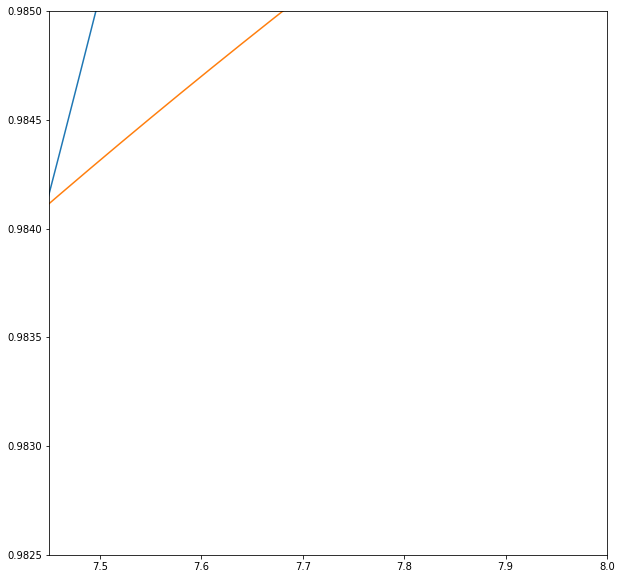

In [24]:
plt.figure(figsize=(10, 10))

ps = np.arange(0.2, 10, .01)

plt.plot(ps, mt.kernel_area2D(ps))
plt.plot(ps, 1-1/(ps*(ps+1)))
plt.gca().axvline(5)
plt.gca().set(ylim=(.9825, .985), xlim=(7.45, 8))

In [35]:
rms(np.array([0, .5, 1, .5, 0])), rms(np.array([0, 1, 0]))

(0.5477225575051661, 0.5773502691896257)

In [12]:
all_runs = pd.read_csv('outputs/FirstHPC/1939884.pbs/1938376.pbs/constant_r.txt', header=None, delimiter=" - ", names=mt.headers)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [10]:
import os
os.listdir('outputs/FirstHPC/1939884.pbs/1938376.pbs/constant_r.txt')

NotADirectoryError: [Errno 20] Not a directory: 'outputs/FirstHPC/1939884.pbs/1938376.pbs/constant_r.txt'

In [18]:
all_runs_means = all_runs.groupby(['p', 'r', 'n']).mean()
all_runs_std = all_runs.groupby(['p', 'r', 'n']).std()

In [20]:
all_runs_means

,,,short_lengthBool,long_lengthBool,short_length,long_length
p,r,n,,,,
0.20,0.1,10000,0.0,-inf,0.000000,-inf
0.25,0.1,10000,0.0,-inf,0.000000,-inf
0.30,0.1,10000,55.0,192.6,4.030837,9.245071
0.35,0.1,10000,40.0,195.0,3.006228,7.078541
0.40,0.1,10000,33.4,194.2,2.599217,5.610135
0.45,0.1,10000,29.8,197.4,2.377581,4.647407
0.50,0.1,10000,27.4,192.6,2.243190,3.991779
0.55,0.1,10000,26.0,194.6,2.173843,3.523067
0.60,0.1,10000,25.0,193.0,2.110098,3.173051


In [21]:
all_runs_std

,,,short_lengthBool,long_lengthBool,short_length,long_length
p,r,n,,,,
0.20,0.1,10000,0.000000,NaN,0.000000e+00,NaN
0.25,0.1,10000,0.000000,NaN,0.000000e+00,NaN
0.30,0.1,10000,1.000000,2.966479,6.330580e-02,0.069116
0.35,0.1,10000,0.707107,3.807887,5.363648e-02,0.021782
0.40,0.1,10000,0.547723,1.923538,7.913268e-03,0.007390
0.45,0.1,10000,0.447214,4.722288,1.372009e-02,0.004304
0.50,0.1,10000,0.547723,2.302173,1.252842e-02,0.001676
0.55,0.1,10000,0.000000,2.302173,7.627859e-03,0.000440
0.60,0.1,10000,0.000000,1.581139,5.202867e-03,0.000430


In [22]:
for label in ['short_lengthBool', 'long_lengthBool', 'short_length', 'long_length']:
    all_runs_means[f'{label}_std'] = all_runs_std[f'{label}']

In [27]:
all_runs_means.headers

AttributeError: 'DataFrame' object has no attribute 'headers'

In [24]:
x = all_runs_means['p']
y = all_runs_means[label]
yerr = all_runs_means[f'{label}_std']
plt.errorbar(x, y, yerr=None)

KeyError: 'p'